# 1. Problem Statement

How can we predict the flight departure delay?

## 1.1 Motivation

Every time a flight is scheduled to depart, unforeseen circumstances such as congestion, accidents, or inclement weather can result in delays or cancellations. Despite arriving at the airport well in advance, passengers may still experience extended wait times. Prolonged delays can test the patience of travelers and potentially lead to conflicts. 

To address this issue, we are working on developing a predictive model using a dataset of departure delays. By accurately predicting the likelihood of a flight being delayed, our aim is to assist travelers in better planning their time and minimizing disruptions to their schedules.

## 1.2 Dataset Source

This dataset contains all flight information including cancellation and delays by airline from January 2019 – August 2023
of all domestic flights within America by US Department of Transportation, Bureau of Transportation Statistics.

The original dataset can be found at https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023?select=flights_sample_3m.csv

*The csv dataset has been renamed as "Flight_data.csv"

# 2. Imports

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calplot
import calmap
import seaborn as sb

pd.set_option("display.max_columns", 500)

# 3. Data and Data Cleaning

## 3.1 Importing the dataset

In [2]:
df = pd.read_csv("Flight_data.csv")
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [3]:
source_headers = [
                "FlightDate",
                "Airline",
                "Airline_dot",
                "Airline_code",
                "DOT_Code",
                "Flight_Number_Reporting_Airline",
                "Origin",
                "OriginCityName",
                "Dest",
                "DestCityName",
                "CRSDepTime",
                "DepTime",
                "DepDelay",
                "TaxiOut",
                "WheelsOff",
                "WheelsOn",
                "TaxiIn",
                "CRSArrTime",
                "ArrTime",
                "ArrDelay",
                "Cancelled",
                "CancellationCode",
                "Diverted",
                "CRSElapsedTime",
                "ActualElapsedTime",
                "AirTime",
                "Distance",
                "CarrierDelay",
                "WeatherDelay",
                "NASDelay",
                "SecurityDelay",
                "LateAircraftDelay"
                ]

df.columns = source_headers

## 3.2 Brief overview of the data

In [4]:
print(f"df shape: {df.shape}")

df shape: (3000000, 32)


In [5]:
display(df.describe())

,DOT_Code,Flight_Number_Reporting_Airline,CRSDepTime,DepTime,DepDelay,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,3.000000e+06,3.000000e+06,3.000000e+06,2.922385e+06,2.922356e+06,2.921194e+06,2.921194e+06,2.920056e+06,2.920056e+06,3.000000e+06,2.920058e+06,2.913802e+06,3.000000e+06,3.000000e+06,2.999986e+06,2.913802e+06,2.913802e+06,3.000000e+06,533863.000000,533863.000000,533863.000000,533863.000000,533863.000000
mean,1.997629e+04,2.511536e+03,1.327062e+03,1.329776e+03,1.012333e+01,1.664305e+01,1.352361e+03,1.462500e+03,7.678982e+00,1.490561e+03,1.466511e+03,4.260858e+00,2.638000e-02,2.352000e-03,1.422758e+02,1.366205e+02,1.123108e+02,8.093616e+02,24.759086,3.985260,13.164728,0.145931,25.471282
std,3.772846e+02,1.747258e+03,4.858789e+02,4.993101e+02,4.925183e+01,9.192901e+00,5.008727e+02,5.272368e+02,6.269639e+00,5.115476e+02,5.318383e+02,5.117482e+01,1.602626e-01,4.844036e-02,7.155669e+01,7.167582e+01,6.975484e+01,5.878939e+02,71.771845,32.410796,33.161122,3.582053,55.766892
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.600000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,8.000000e+00,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979000e+04,1.051000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,1.053000e+03,-1.600000e+01,0.000000e+00,0.000000e+00,9.000000e+01,8.400000e+01,6.100000e+01,3.770000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.993000e+04,2.152000e+03,1.320000e+03,1.323000e+03,-2.000000e+00,1.400000e+01,1.336000e+03,1.501000e+03,6.000000e+00,1.516000e+03,1.505000e+03,-7.000000e+00,0.000000e+00,0.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,4.000000,0.000000,0.000000,0.000000,0.000000
75%,2.036800e+04,3.797000e+03,1.730000e+03,1.739000e+03,6.000000e+00,1.900000e+01,1.752000e+03,1.908000e+03,9.000000e+00,1.919000e+03,1.913000e+03,7.000000e+00,0.000000e+00,0.000000e+00,1.720000e+02,1.670000e+02,1.420000e+02,1.046000e+03,23.000000,0.000000,17.000000,0.000000,30.000000
max,2.045200e+04,9.562000e+03,2.359000e+03,2.400000e+03,2.966000e+03,1.840000e+02,2.400000e+03,2.400000e+03,2.490000e+02,2.400000e+03,2.400000e+03,2.934000e+03,1.000000e+00,1.000000e+00,7.050000e+02,7.390000e+02,6.920000e+02,5.812000e+03,2934.000000,1653.000000,1741.000000,1185.000000,2557.000000


In [6]:
df.dtypes

FlightDate                          object
Airline                             object
Airline_dot                         object
Airline_code                        object
DOT_Code                             int64
Flight_Number_Reporting_Airline      int64
Origin                              object
OriginCityName                      object
Dest                                object
DestCityName                        object
CRSDepTime                           int64
DepTime                            float64
DepDelay                           float64
TaxiOut                            float64
WheelsOff                          float64
WheelsOn                           float64
TaxiIn                             float64
CRSArrTime                           int64
ArrTime                            float64
ArrDelay                           float64
Cancelled                          float64
CancellationCode                    object
Diverted                           float64
CRSElapsedT

## 3.3 Data categorization

### 3.3.1 Generating new column to categorize flights by delay situation

Definition:

OnTime: Flight departure within 15 minutes 

Cancelled: Flight is cancelled

Delayed: Flight departure more then 15 minutes

Early: Flight departure before planned time

In [7]:
df['Cancelled'] = df['Cancelled'].astype(bool)

df['DelaySituation'] = 'OnTime'
df.loc[df['Cancelled'], 'DelaySituation'] = 'Cancelled'
df.loc[(df['DepDelay'] > 15) & (~df['Cancelled']), 'DelaySituation'] = 'Delayed'
df.loc[(df['DepDelay'] < 0) & (~df['Cancelled']), 'DelaySituation'] = 'Early'

display(df.head(20))

,FlightDate,Airline,Airline_dot,Airline_code,DOT_Code,Flight_Number_Reporting_Airline,Origin,OriginCityName,Dest,DestCityName,CRSDepTime,DepTime,DepDelay,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DelaySituation
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,False,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN,Early
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,False,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN,Early
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,False,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN,OnTime
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,False,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,Early
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,False,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN,Early
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",1010,1237.0,147.0,15.0,1252.0,1328.0,3.0,1110,1331.0,141.0,False,NaN,0.0,60.0,54.0,36.0,181.0,141.0,0.0,0.0,0.0,0.0,Delayed
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001.0,-9.0,23.0,1024.0,1122.0,8.0,1159,1130.0,-29.0,False,NaN,0.0,109.0,89.0,58.0,399.0,NaN,NaN,NaN,NaN,NaN,Early
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",1643,1637.0,-6.0,22.0,1659.0,1927.0,41.0,1945,2008.0,23.0,False,NaN,0.0,122.0,151.0,88.0,613.0,0.0,0.0,23.0,0.0,0.0,Early
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527.0,-3.0,11.0,538.0,658.0,8.0,717,706.0,-11.0,False,NaN,0.0,227.0,219.0,200.0,1379.0,NaN,NaN,NaN,NaN,NaN,Early
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",2125,2116.0,-9.0,19.0,2135.0,2353.0,3.0,2355,2356.0,1.0,False,NaN,0.0,210.0,220.0,198.0,1533.0,NaN,NaN,NaN,NaN,NaN,Early


### 3.3.2 Generating of new column for expected Departure times

In [8]:
time_cols = ["CRSDepTime", "DepTime", "CRSArrTime", "ArrTime"]
for col in time_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(0)
    df[col] = df[col].astype(int)
    df[col] = df[col].astype(str)

In [10]:
def combine_date_time(date_col, time_col, new_col_name):
    date_str = df[date_col].astype(str)
    time_str = df[time_col].astype(str)
    time_str = time_str.apply(lambda x: x.zfill(4) if len(x) < 4 else x.rjust(4, '0'))
    datetime_str = date_str + ' ' + time_str
    
    df[new_col_name] = pd.to_datetime(datetime_str, format='%Y-%m-%d %H%M')

combine_date_time("FlightDate", "CRSDepTime", "CRSDepFlightDate")

In [11]:
df.loc[0:5, ["CRSDepFlightDate", "CRSDepTime", "DepTime", "DepDelay" ]] 

,CRSDepFlightDate,CRSDepTime,DepTime,DepDelay
0,2019-01-09 11:55:00,1155,1151,-4.0
1,2022-11-19 21:20:00,2120,2114,-6.0
2,2022-07-22 09:54:00,954,1000,6.0
3,2023-03-06 16:09:00,1609,1608,-1.0
4,2020-02-23 18:40:00,1840,1838,-2.0
5,2019-07-31 10:10:00,1010,1237,147.0


### 3.3.3 Categorising Flight Delays By Length
Based on: https://www.oag.com/airline-on-time-performance-defining-late
Flight delays can be categorised into 5 different categories.
- Early (Before 0 minutes)
- On Time (0 - 15 minutes)
- Small Delays (15 - 30 minutes) 
- Medium Delays (30 - 60 minutes)
- Large Delays (More than 60 minutes)

In [12]:
bins = [-np.inf ,0,15, 30, 60, np.inf]
labels = ['Early', 'OnTime','SmallDelays', 'MediumDelays', 'LargeDelays']
df['DelayCategory'] = pd.cut(df['DepDelay'], bins=bins, labels=labels, right=False)

## 3.4 Calendar View

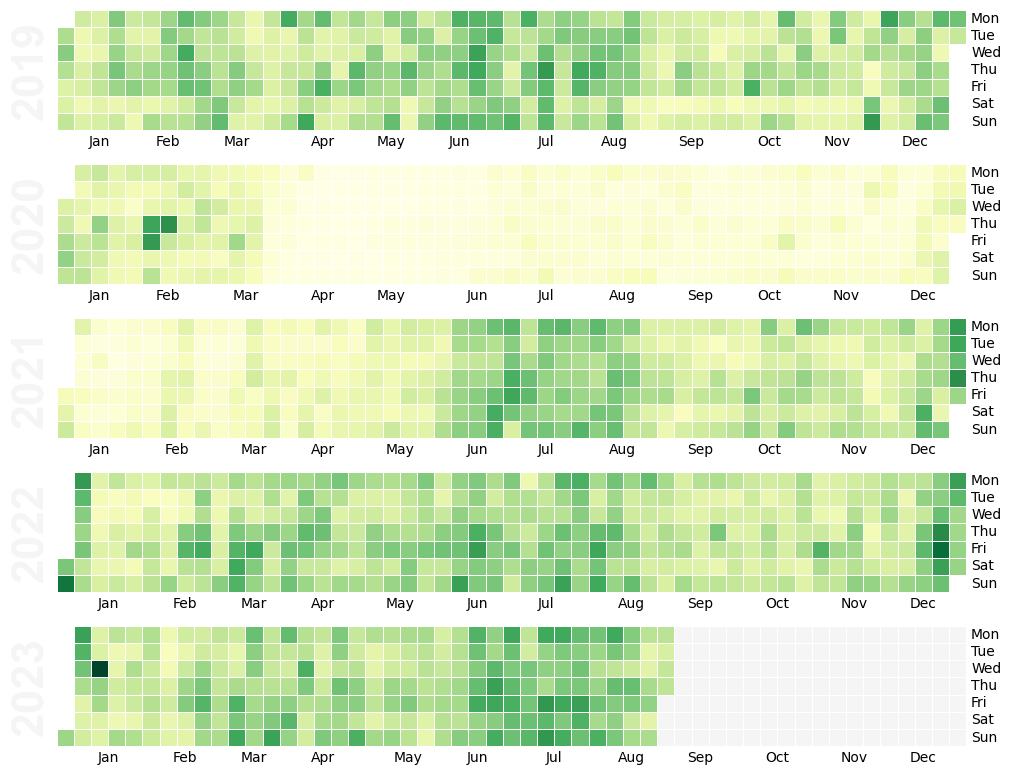

In [13]:
delayed_events = df[df['DelaySituation'] == 'Delayed']
delayed_events = delayed_events.groupby('FlightDate')['DelaySituation'].count().reset_index(name='DelaySituation')

# Convert 'FlightDate' to datetime format if it's not already
delayed_events['FlightDate'] = pd.to_datetime(delayed_events['FlightDate'])

# Since calmap.calendarplot expects a Series with a datetime index, we prepare the data accordingly
delay_series = delayed_events.set_index('FlightDate')['DelaySituation']

# Plotting the filtered data
fig, ax = calmap.calendarplot(delay_series, 
                              cmap='YlGn',  
                              linewidth=0.5, 
                              fig_kws=dict(figsize=(16, 8)))

plt.show()

## 3.5 Removing Unnecessary Data

During the COVID-19 pandemic, the aviation industry experienced significant disruptions, with many flights being cancelled and the overall landscape of air travel being destabilized.

From March 24, 2020 to June 2, 2021, there was a notable decrease in the frequency of flight delays due to the reduced number of flights as a result of the pandemic. Including data from these years in any analysis or training would introduce a significant imbalance, therefore the years 2020 and 2021 were excluded from consideration.

In [14]:
# Removing the aforementioned years
# Step 1: Convert the FlightDate column to datetime format (if it's not already)
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Step 2: Filter the DataFrame to keep rows with FlightDate after 2021-07-01
df = df[df['FlightDate'] > pd.Timestamp('2021-07-01')]

## 3.6 Checking how complete the dataset is

In [15]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=((df.shape[0]-missing_df['missing values'])/df.shape[0])*100
display(missing_df.sort_values('filling factor (%)').reset_index(drop = True))

,variable,missing values,filling factor (%)
0,CancellationCode,1461089,2.179110
1,LateAircraftDelay,1183111,20.789924
2,SecurityDelay,1183111,20.789924
3,NASDelay,1183111,20.789924
4,WeatherDelay,1183111,20.789924
5,CarrierDelay,1183111,20.789924
6,ActualElapsedTime,36251,97.572971
7,AirTime,36251,97.572971
8,ArrDelay,36251,97.572971
9,WheelsOn,32935,97.794980


# 4. Exploratory Data Analysis

## 4.1 Airlines

In [16]:
df['Airline'].value_counts()

Airline
Southwest Airlines Co.    291486
Delta Air Lines Inc.      200844
American Airlines Inc.    196769
SkyWest Airlines Inc.     162437
United Air Lines Inc.     141906
Republic Airline           71173
JetBlue Airways            59197
Envoy Air                  54461
Spirit Air Lines           52479
Endeavor Air Inc.          51190
Alaska Airlines Inc.       50770
PSA Airlines Inc.          47555
Frontier Airlines Inc.     35278
Allegiant Air              26103
Mesa Airlines Inc.         20267
Hawaiian Airlines Inc.     16947
Horizon Air                14775
Name: count, dtype: int64

In [17]:
df['Airline'] = df['Airline'].astype('category')

# Use pivot_table to get counts
airline_df = df.pivot_table(index='Airline', 
                            columns='DelaySituation', 
                            aggfunc='size', 
                            fill_value=0)

# Calculate the percentage of each delay situation for each airline
airline_df_percentage = airline_df.div(airline_df.sum(axis=1), axis=0) * 100
airline_df_percentage['OnTime_Early_Total'] = airline_df_percentage['OnTime'] + airline_df_percentage['Early']

# Sorted by the total percentage of OnTime and Early
result_df = airline_df_percentage.sort_values(by='OnTime_Early_Total', ascending=False)[['Early','OnTime', 'Delayed', 'Cancelled']]

# Display the result
print(result_df) 

DelaySituation              Early     OnTime    Delayed  Cancelled
Airline                                                           
Endeavor Air Inc.       72.725142  12.664583  12.252393   2.357882
Horizon Air             62.436548  22.808799  13.170897   1.583756
Envoy Air               65.646977  18.078992  14.447035   1.826995
SkyWest Airlines Inc.   66.460843  16.631679  15.088311   1.819167
Republic Airline        70.942633  11.946946  13.485451   3.624970
PSA Airlines Inc.       67.845652  14.459047  15.481022   2.214278
Delta Air Lines Inc.    57.745813  24.504093  16.419709   1.330386
Alaska Airlines Inc.    58.142604  22.672838  17.309435   1.875123
Hawaiian Airlines Inc.  48.333038  31.970260  18.681773   1.014929
United Air Lines Inc.   53.748256  24.448579  20.011134   1.792031
Mesa Airlines Inc.      58.908571  19.277643  18.636207   3.177579
American Airlines Inc.  55.817736  20.724301  21.078015   2.379948
Spirit Air Lines        50.519255  21.631510  24.920444   2.92

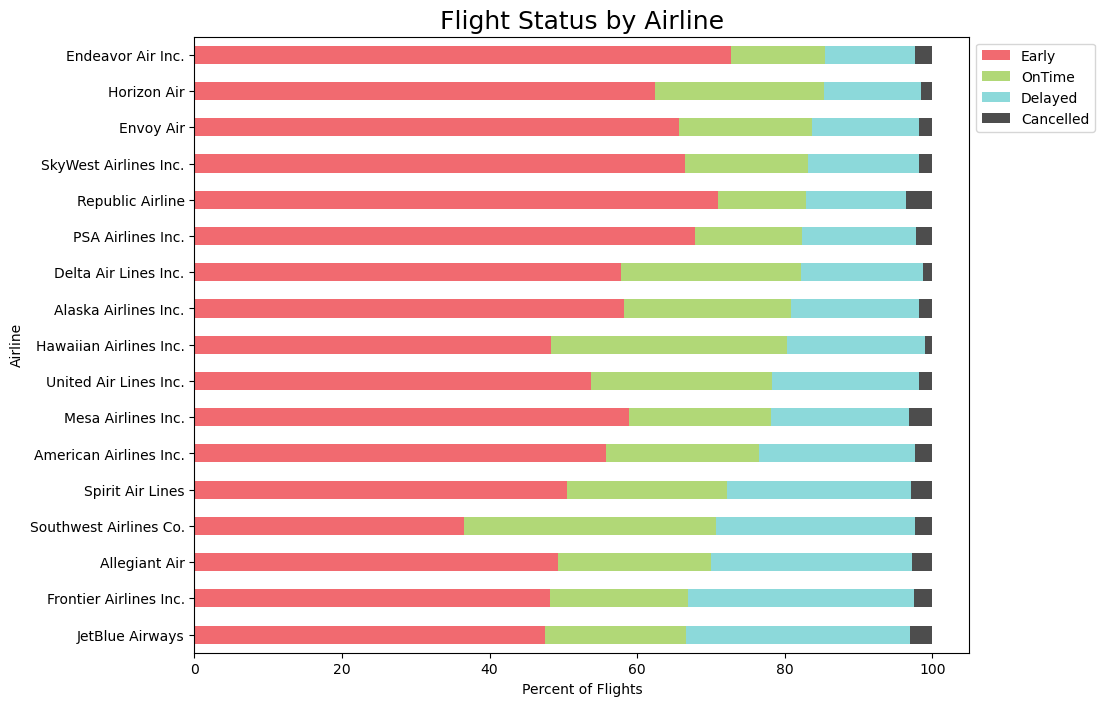

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#F16A70','#B1D877', '#8CD9DA', '#4D4D4D']
result_df['OnTime_Early_Total'] = airline_df_percentage['OnTime_Early_Total']
result_df.sort_values(by=['OnTime_Early_Total', 'Early'], ascending=True)[['Early','OnTime','Delayed','Cancelled']].plot(kind='barh', stacked=True, ax=ax, color=colors)
ax.legend(bbox_to_anchor=(1,1))
ax.set_title('Flight Status by Airline', fontsize=18)
ax.set_xlabel('Percent of Flights')
plt.show()

## 4.2 Types of Delay

In [19]:
df['DelayCategory'].value_counts()

DelayCategory
Early           815680
OnTime          331638
SmallDelays     112074
LargeDelays     105843
MediumDelays     96706
Name: count, dtype: int64

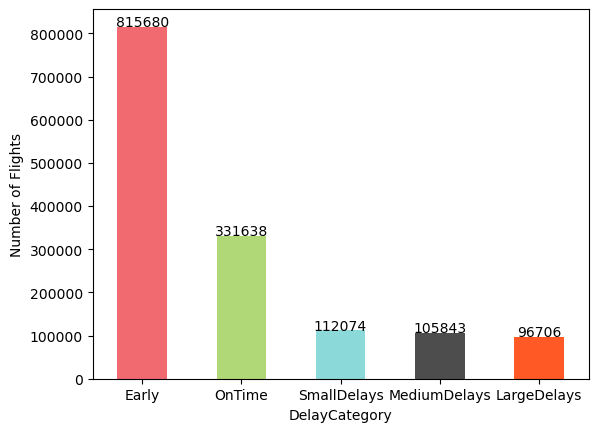

In [20]:
category_counts = df['DelayCategory'].value_counts()
custom_palette = ['#F16A70','#B1D877', '#8CD9DA', '#4D4D4D','#FF5926']
ax = category_counts.plot(kind='bar', color = custom_palette)
ax.set_xticklabels(labels, rotation=0)
ax.set_ylabel('Number of Flights')

for i, v in enumerate(category_counts):
    ax.text(i, v + 1000, str(v), ha='center')

plt.show()

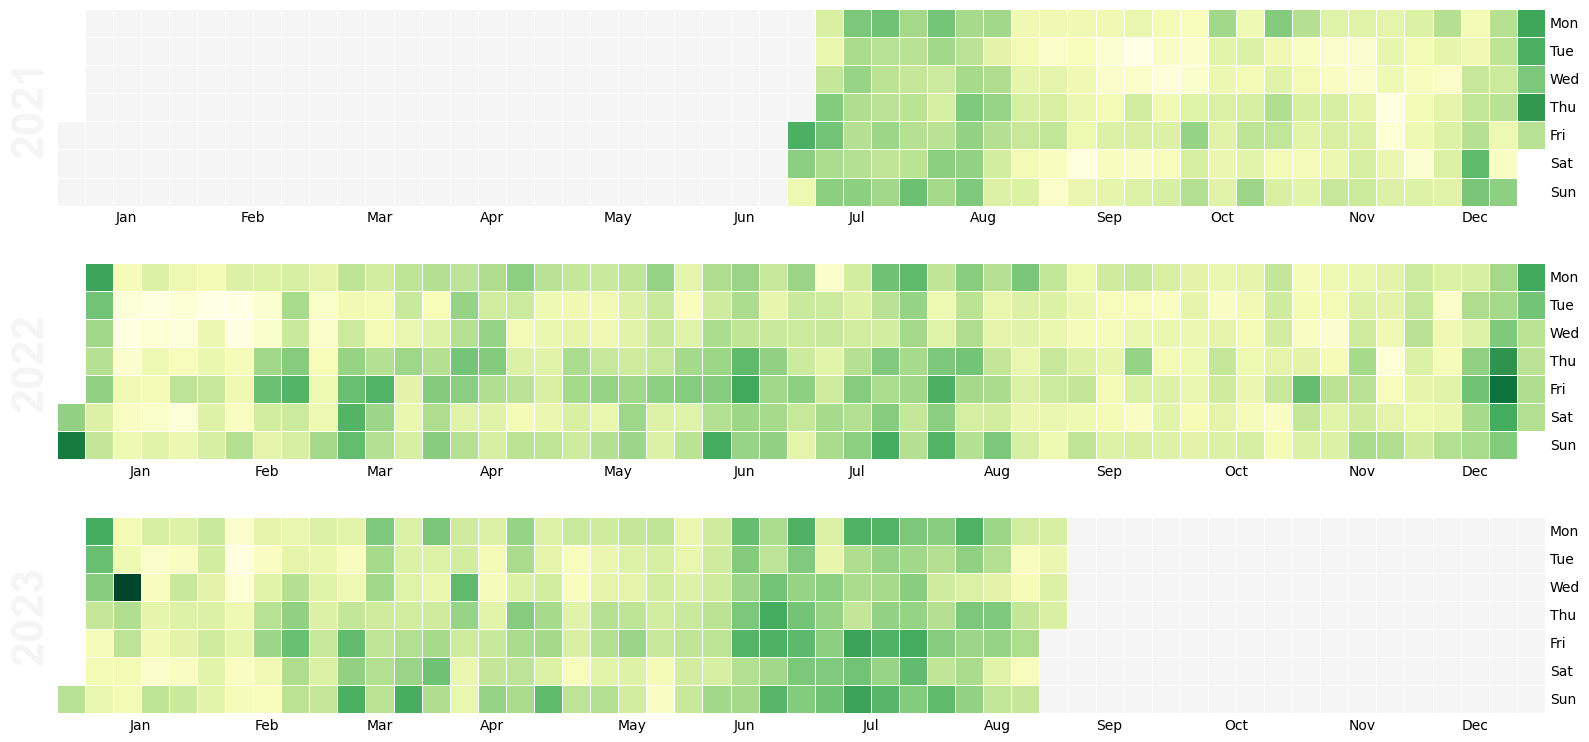

In [21]:
delayed_events = df[df['DelaySituation'] == 'Delayed']
delayed_events = delayed_events.groupby('FlightDate')['DelaySituation'].count().reset_index(name='DelaySituation')

# Convert 'FlightDate' to datetime format if it's not already
delayed_events['FlightDate'] = pd.to_datetime(delayed_events['FlightDate'])

# Since calmap.calendarplot expects a Series with a datetime index, we prepare the data accordingly
delay_series = delayed_events.set_index('FlightDate')['DelaySituation']

# # Now, filter the series for the date range May 2021 to July 2022
# start_date = '2021-06-01'
# end_date = '2023-07-31'

# # Ensure the dates in the series are within the specified range
# filtered_series = delay_series[(delay_series.index >= start_date) & (delay_series.index <= end_date)]

# Plotting the filtered data
fig, ax = calmap.calendarplot(delay_series, 
                              cmap='YlGn',  
                              linewidth=0.5, 
                              fig_kws=dict(figsize=(16, 8)))

plt.show()

## 4.3 By Times

### 4.3.1 Years

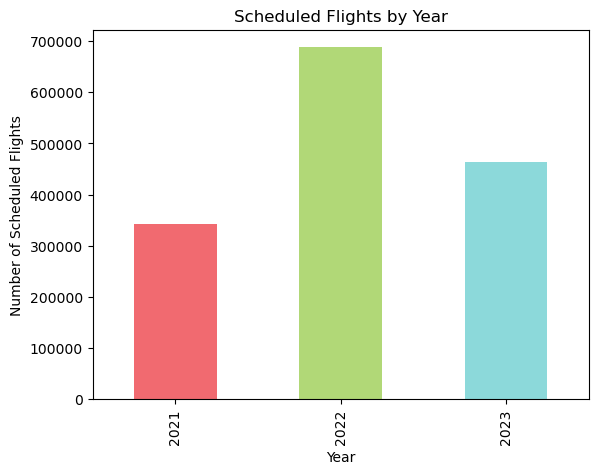

In [22]:
# Convert 'FlightDate' to datetime if it isn't already
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Extract the year from 'FlightDate'
df['Year'] = df['FlightDate'].dt.year

# Group by the 'Year' and count flights
scheduled_flights_by_year = df.groupby('Year').size()

scheduled_flights_by_year.plot(kind='bar', color = custom_palette)
plt.xlabel('Year')
plt.ylabel('Number of Scheduled Flights')
plt.title('Scheduled Flights by Year')
plt.show()

### 4.3.2 Months

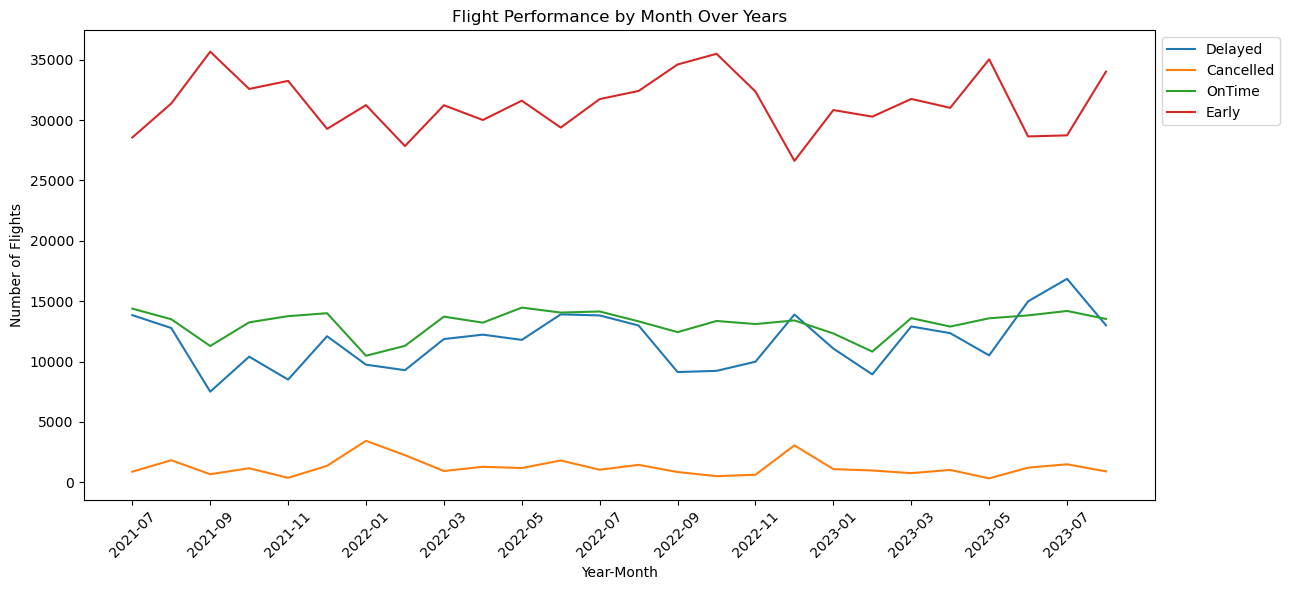

In [23]:
# Combine the 'Year' and 'Month' into a single column for easy plotting
df['YearMonth'] = df['FlightDate'].dt.to_period('M')

# Group by 'YearMonth' and get the count for each 'DelaySituation'
performance_by_year_month = df.groupby(['YearMonth', 'DelaySituation']).size().unstack().fillna(0)

# Sort the DataFrame by YearMonth
performance_by_year_month = performance_by_year_month.sort_index()

# Now let's plot the performance by month across years
plt.figure(figsize=(13, 6))

# Plot each delay situation
for situation in ['Delayed', 'Cancelled', 'OnTime', 'Early']:
    # It is assumed that 'custom_palette' is a dictionary with keys corresponding to the delay situations
    plt.plot(performance_by_year_month.index.astype(str), performance_by_year_month[situation], label=situation)

# Add labels, title, and legend
plt.xlabel('Year-Month')
plt.ylabel('Number of Flights')
plt.title('Flight Performance by Month Over Years')
plt.legend()

# X-ticks: Convert 'YearMonth' Period to string and set them as labels
xtick_labels = [str(period) for period in performance_by_year_month.index[::2]]  # Every 2 periods 
xtick_locations = np.arange(0, len(performance_by_year_month.index), step=2)  # Set x-tick locations

plt.xticks(ticks=xtick_locations, labels=xtick_labels, rotation=45)

# Display the legend to the right of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Adjust the layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

### 4.3.3 Days of Week

In [24]:
# Convert 'FlightDate' to datetime if it isn't already
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Extract the day of the week from 'FlightDate'
df['DayOfWeek'] = df['FlightDate'].dt.day_name()

flights_by_day_name = df.groupby('DayOfWeek')['DelaySituation'].value_counts().unstack()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
flights_by_day_name = flights_by_day_name.reindex(ordered_days)

display(flights_by_day_name)

DelaySituation,Cancelled,Delayed,Early,OnTime
DayOfWeek,,,,
Monday,4584,45540,120420,51340
Tuesday,3666,36189,122774,44718
Wednesday,4482,38169,122460,45423
Thursday,5440,45527,119975,51005
Friday,5203,49859,114035,52491
Saturday,4167,40127,103968,44468
Sunday,5006,48230,111811,52560


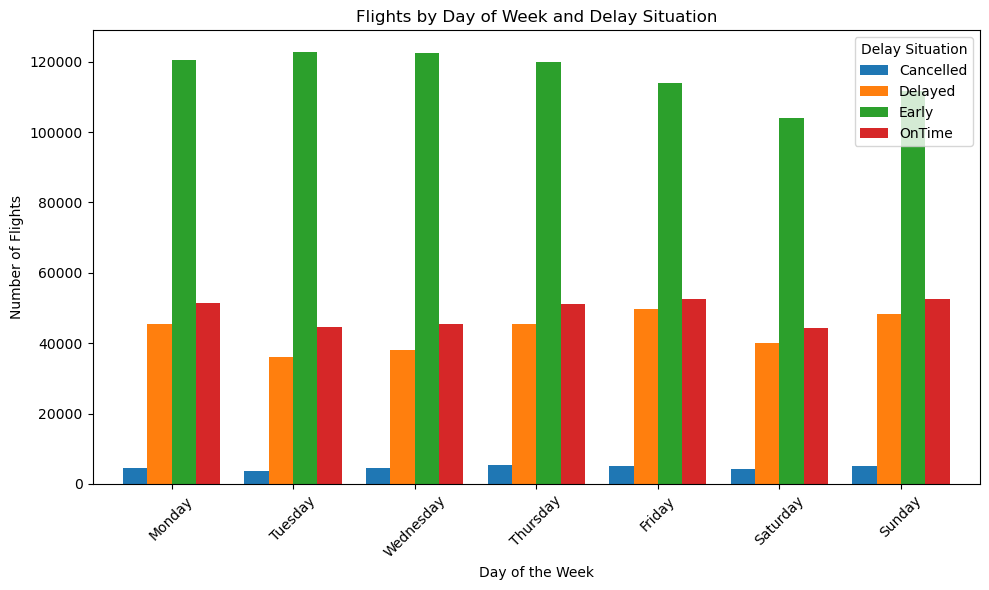

In [25]:
flights_by_day_name.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Flights by Day of Week and Delay Situation')
plt.ylabel('Number of Flights')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.legend(title='Delay Situation')
plt.tight_layout()
plt.show()

## 4.4 Origin City

In [25]:
df['OriginCityName'] = df['OriginCityName'].astype('category')

# Use pivot_table to get counts
OriCity_df = df.pivot_table(index='OriginCityName', 
                            columns='DelaySituation', 
                            aggfunc='size', 
                            fill_value=0)

# Calculate the percentage of each delay situation for each airline
OriCity_df_percentage = OriCity_df.div(OriCity_df.sum(axis=1), axis=0) * 100
OriCity_df_percentage['OnTime_Early_Total'] = OriCity_df_percentage['OnTime'] + OriCity_df_percentage['Early']

# Sorted by the total percentage of OnTime and Early
result_ori_df = OriCity_df_percentage.sort_values(by=['OnTime_Early_Total', 'Early'], ascending=False)[['Early','OnTime', 'Delayed', 'Cancelled']]

# Display the result
print(result_ori_df) 

DelaySituation         Early     OnTime    Delayed  Cancelled
OriginCityName                                               
New Haven, CT     100.000000   0.000000   0.000000   0.000000
Florence, SC       87.500000  12.500000   0.000000   0.000000
Saipan, TT         90.909091   5.681818   2.272727   1.136364
Dubuque, IA        90.769231   4.615385   3.076923   1.538462
Rock Springs, WY   83.185841  11.504425   2.654867   2.654867
...                      ...        ...        ...        ...
Stockton, CA       37.037037  22.222222  38.518519   2.222222
Wilmington, DE     42.857143  14.285714  28.571429  14.285714
Santa Maria, CA    40.476190  14.285714  35.714286   9.523810
Ashland, WV        24.210526  29.473684  41.052632   5.263158
Owensboro, KY      42.105263  10.526316  36.842105  10.526316

[368 rows x 4 columns]


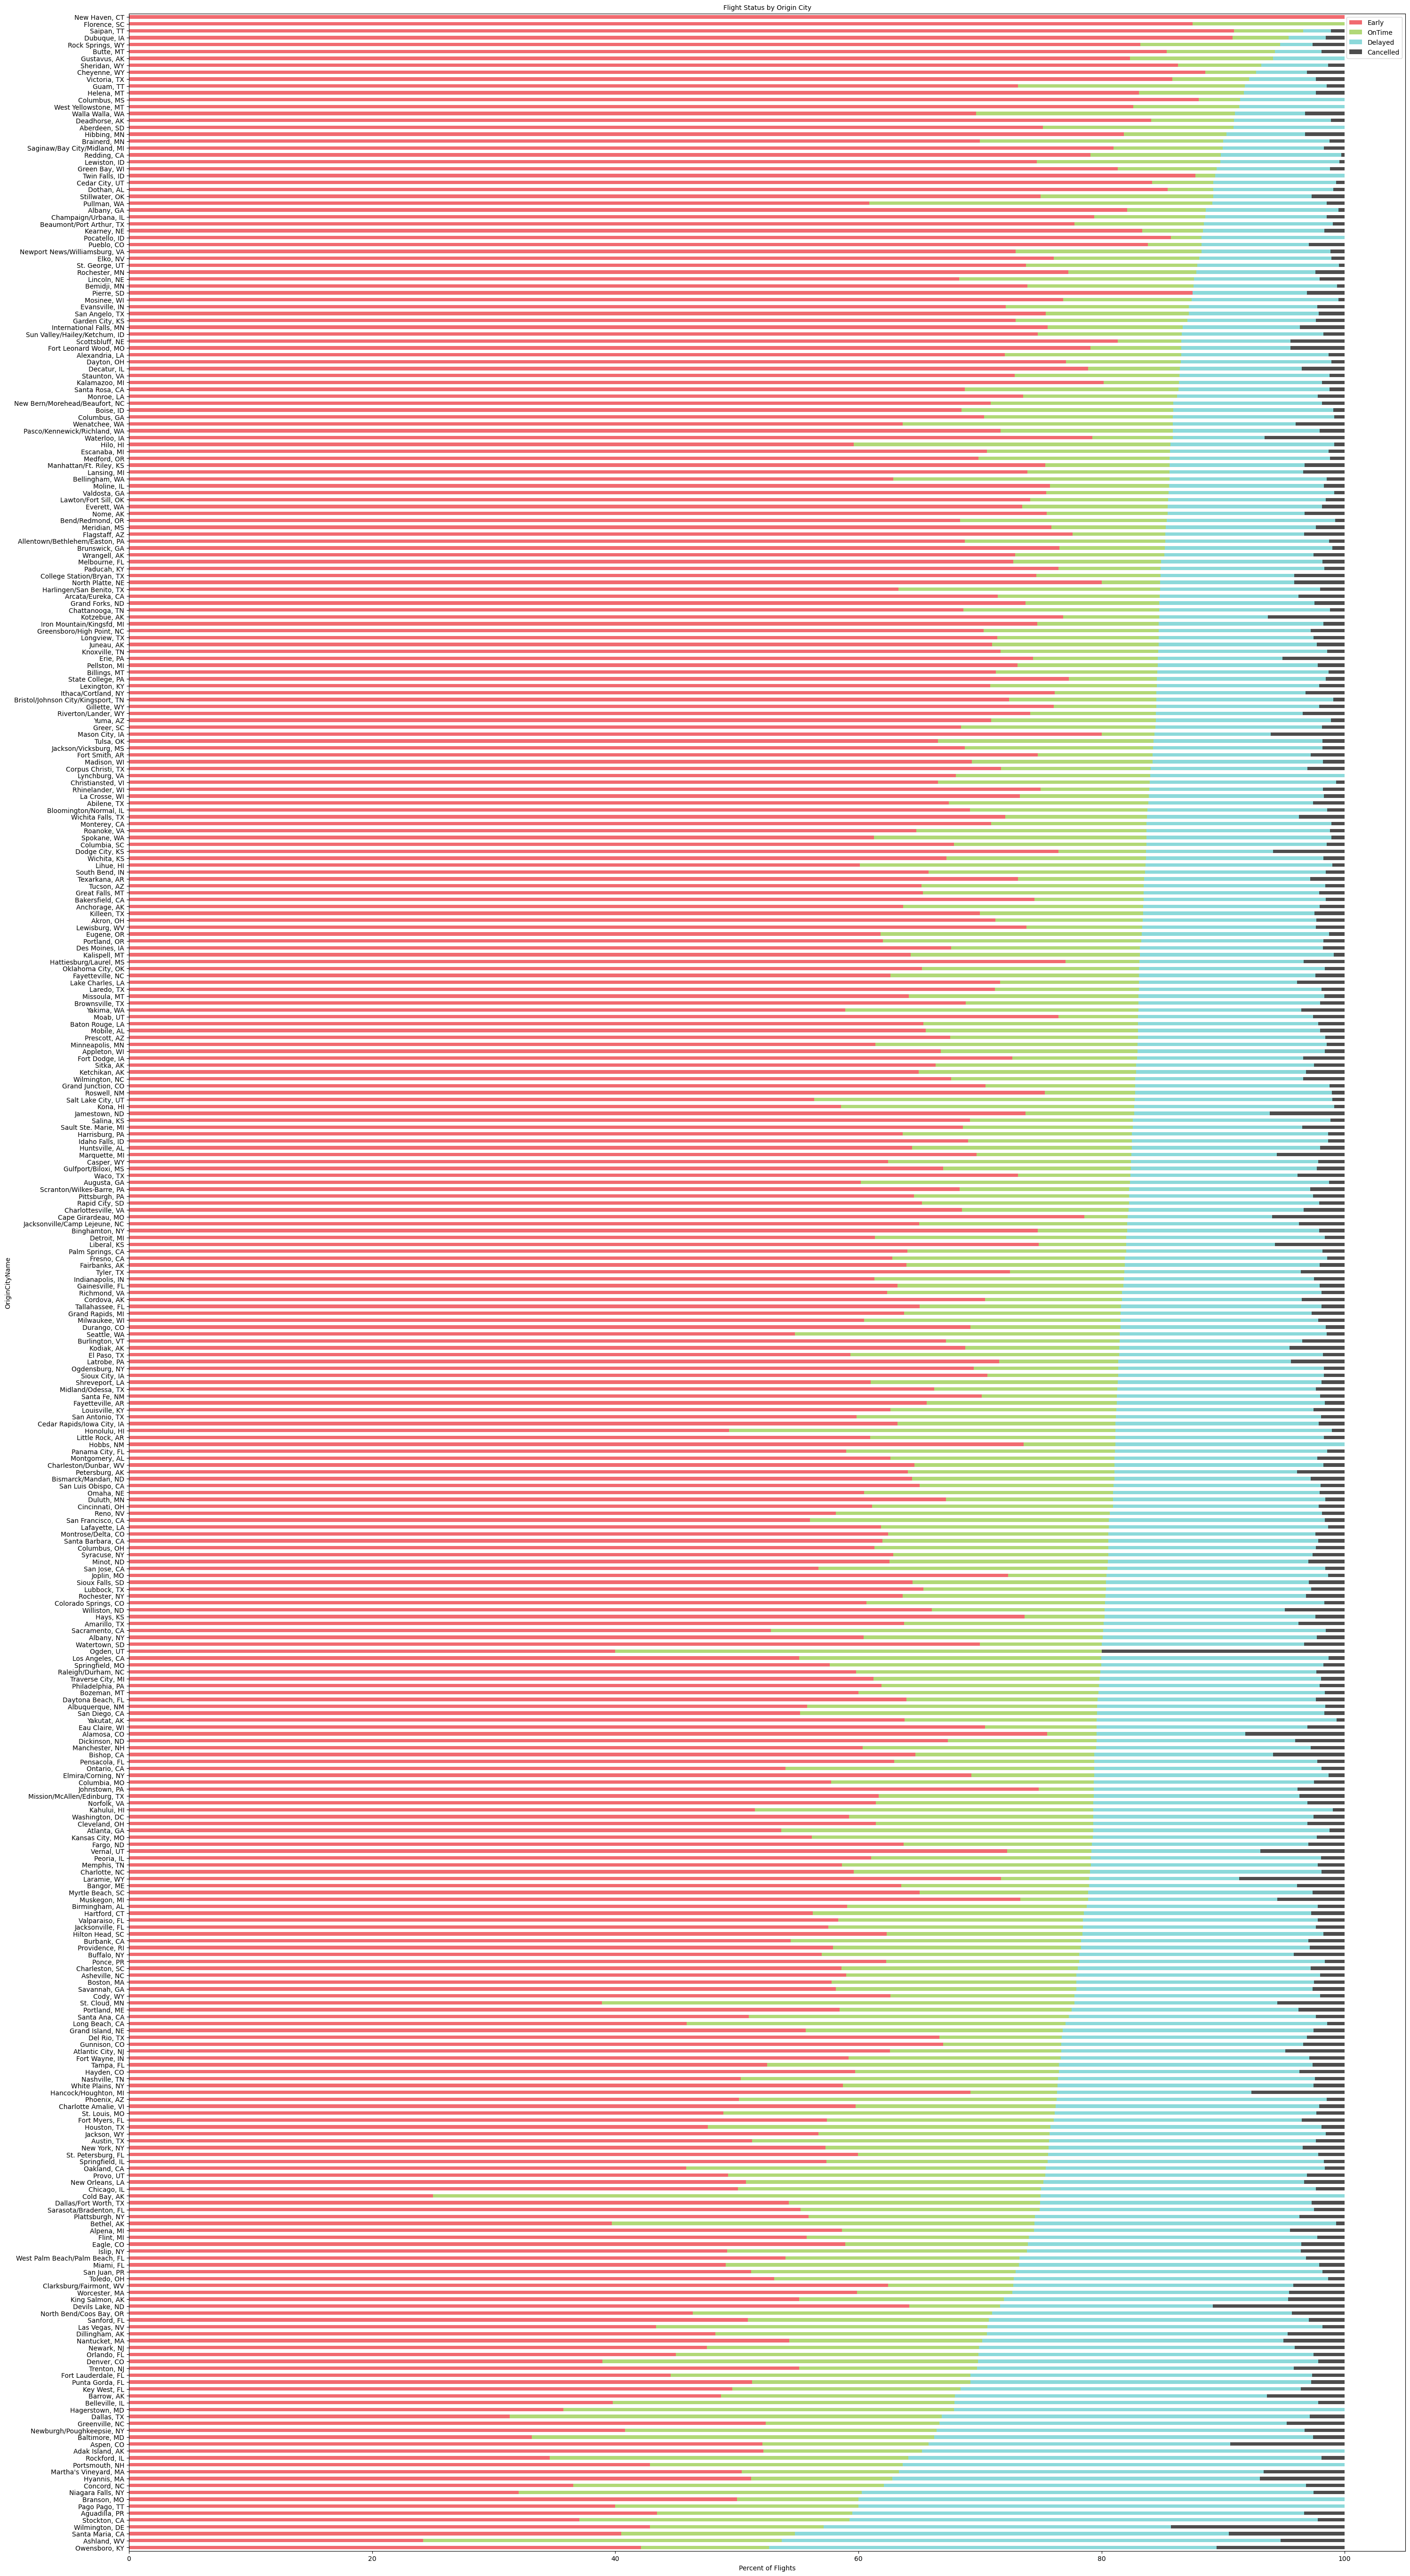

In [26]:
fig, ax = plt.subplots(figsize=(35, 70))
colors = ['#F16A70','#B1D877', '#8CD9DA', '#4D4D4D']
result_ori_df['OnTime_Early_Total'] = OriCity_df_percentage['OnTime_Early_Total']
result_ori_df.sort_values(by=['OnTime_Early_Total', 'Early'], ascending=True)[['Early','OnTime','Delayed','Cancelled']].plot(kind='barh', stacked=True, ax=ax, color=colors)
ax.legend(bbox_to_anchor=(1,1))
ax.set_title('Flight Status by Origin City', fontsize=10)
ax.set_xlabel('Percent of Flights')
plt.show()

# 5. Model Creation

The objective of the model is to accurately forecast the likelihood of a flight being delayed. The rationale behind this initiative is to predict flight delays based on variables within the control of the consumer.

## 5.1 Imports for Machine Learning

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_squared_error

## 5.2 Training

The initial approach will involve utilizing the variable 'Airline' to predict the likelihood of a flight delay.

In [28]:
x = df[['Airline']]
y = df['DelaySituation']

encoder = OneHotEncoder()
x_encoded = encoder.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=1015)

le = LabelEncoder()

le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

## 5.3 Baseline Models

We selected the following models that are capable of handling multiclass labels in order to assess their performance.

 • DecisionTreeClassifier
 • ExtraTreeClassifier
 • BernoulliNB
 • BaggingClassifier
 • RandomForestClassifier
 • GradientBoostingClassifier

In [29]:
print(df.dtypes)

FlightDate                         datetime64[ns]
Airline                                  category
Airline_dot                                object
Airline_code                               object
DOT_Code                                    int64
Flight_Number_Reporting_Airline             int64
Origin                                     object
OriginCityName                           category
Dest                                       object
DestCityName                               object
CRSDepTime                                 object
DepTime                                    object
DepDelay                                  float64
TaxiOut                                   float64
WheelsOff                                 float64
WheelsOn                                  float64
TaxiIn                                    float64
CRSArrTime                                 object
ArrTime                                    object
ArrDelay                                  float64


In [30]:
def gen_matrix_plot(y_train, train_preds, y_test, test_preds, name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
    
    # Confusion matrix plot for train set
    cm_train = confusion_matrix(y_train, train_preds)
    sb.heatmap(cm_train, annot=True, fmt='d', ax=ax1)
    ax1.set_title(f"{name} Train Confusion Matrix")
    
    # Confusion matrix plot for test set
    cm_test = confusion_matrix(y_test, test_preds)
    sb.heatmap(cm_test, annot=True, fmt='d', ax=ax2)
    ax2.set_title(f"{name} Test Confusion Matrix")
    
    plt.tight_layout()
    plt.show()
    
def train_models(x_train, y_train, x_test, y_test, model_algo, name):
    
    if name == "BernoulliNB":
        pipe = make_pipeline(model_algo)
    else:
        pipe = make_pipeline(preprocessing.StandardScaler(with_mean=False), model_algo)
        
    # Training Model
    pipe.fit(x_train, y_train)

    # Predict
    train_preds = pipe.predict(x_train)
    test_preds = pipe.predict(x_test)
    
    # Metrics
    metrics_mat = {}
    metrics_mat['name'] = name

    # Train metrics
    metrics_mat['train_accuracy'] = accuracy_score(y_train, train_preds)
    metrics_mat['train_f1_score'] = f1_score(y_train, train_preds, average='weighted')

    # Test metrics
    metrics_mat['test_accuracy'] = accuracy_score(y_test, test_preds)
    metrics_mat['test_f1_score'] = f1_score(y_test, test_preds, average='weighted')
    
    gen_matrix_plot(y_train, train_preds, y_test, test_preds, name)
    
    return metrics_mat

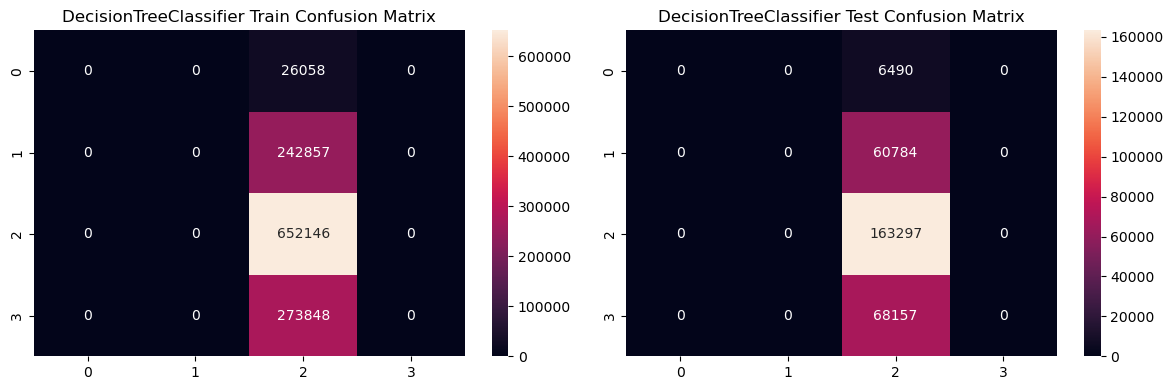

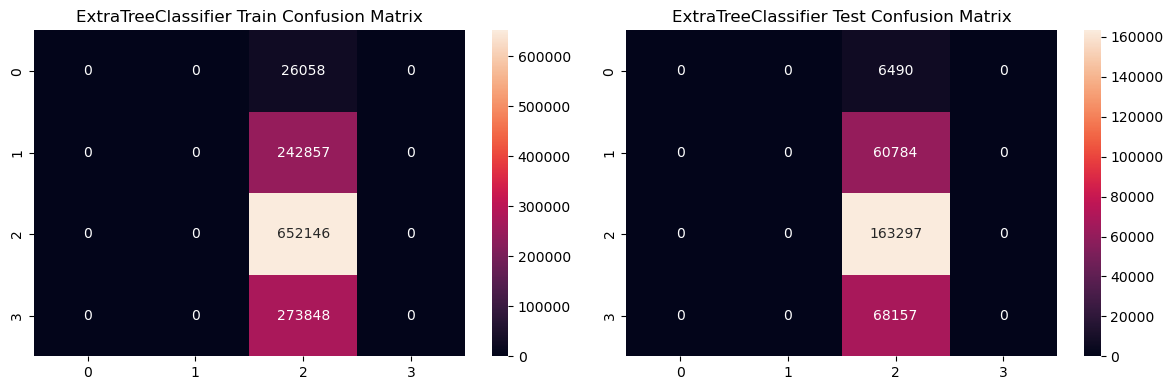

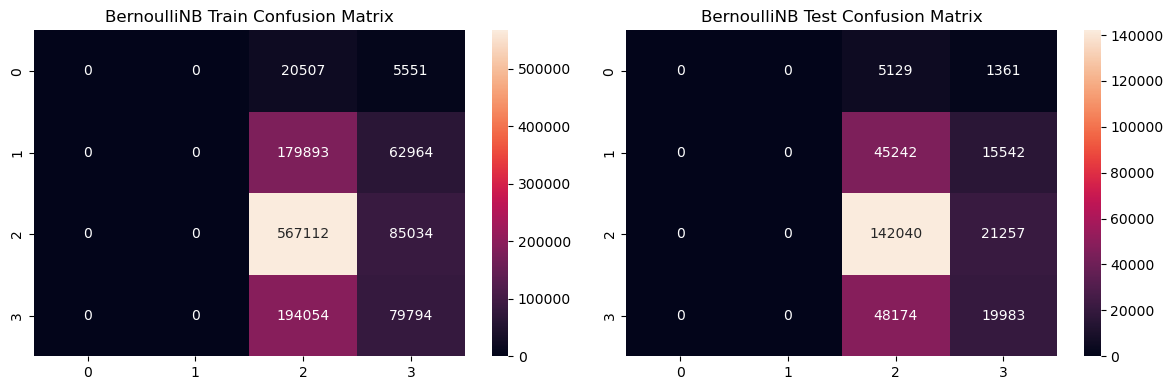

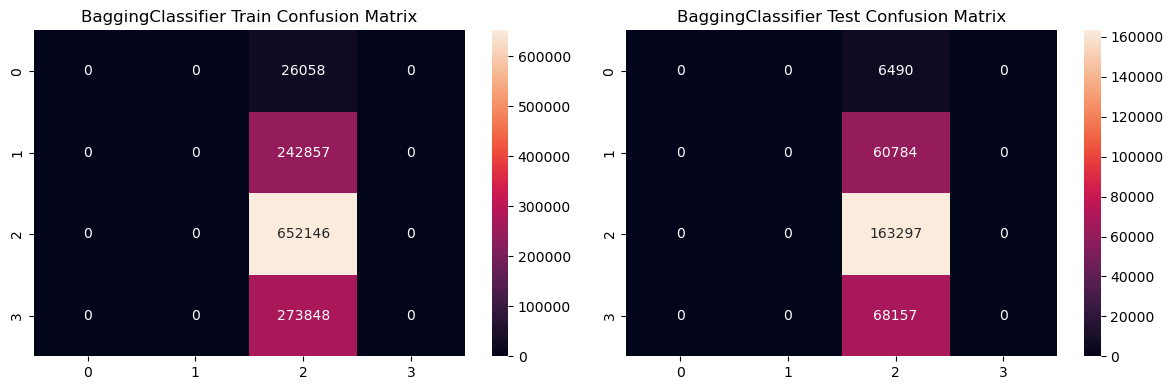

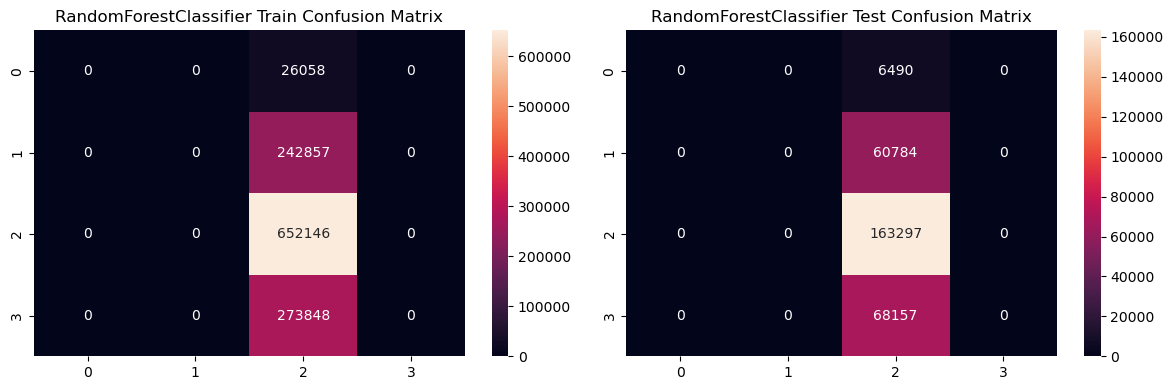

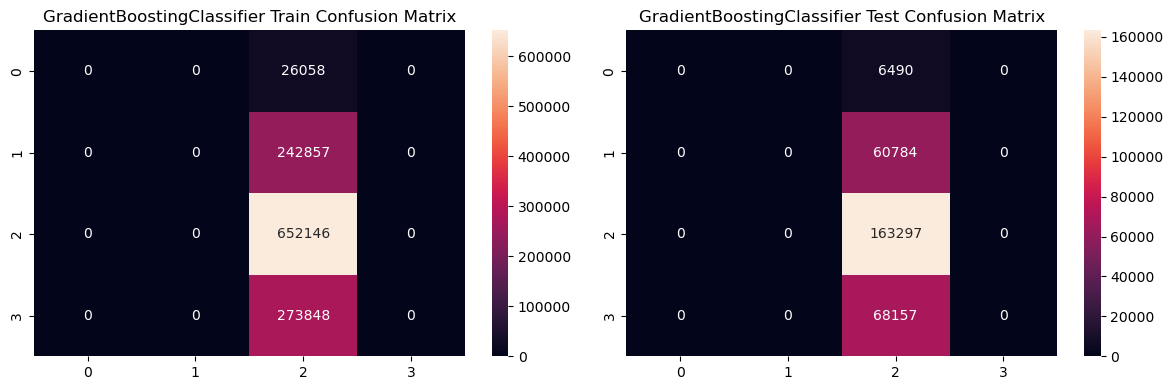

,name,train_accuracy,train_f1_score,test_accuracy,test_f1_score
0,DecisionTreeClassifier,0.545770,0.385394,0.546641,0.386407
1,ExtraTreeClassifier,0.545770,0.385394,0.546641,0.386407
2,BernoulliNB,0.541385,0.455715,0.542376,0.456690
3,BaggingClassifier,0.545770,0.385394,0.546641,0.386407
4,RandomForestClassifier,0.545770,0.385394,0.546641,0.386407
5,GradientBoostingClassifier,0.545770,0.385394,0.546641,0.386407


In [31]:
models = [
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    BernoulliNB(),
    BaggingClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

names = [
    'DecisionTreeClassifier',
    'ExtraTreeClassifier',
    'BernoulliNB',
    'BaggingClassifier',
    'RandomForestClassifier',
    'GradientBoostingClassifier'
]

results = []
for model, name in zip(models, names):
    metrics = train_models(x_train, y_train, x_test, y_test, model, name)
    results.append(metrics)

results_df = pd.DataFrame(results)
display(results_df)

Except BernoulliNB, all the other models perform the same and predict everything as category 2. The accuracy of the models are only 0.54 which is lower than expected as well.

## 5.4 Upgrading Model

More features are added to the model to attempt to see if it can be improved.

 • Airline
 • Origin
 • Destination ('Dest')
 • Month
 • The day of the week ('DayOfWeek')

In [32]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

df['Month'] = df['FlightDate'].dt.month
df['DayOfWeekIndex'] = df['FlightDate'].dt.dayofweek

cat_cols = ["Airline", "Origin", "Dest"]
for c in cat_cols:
    df[c] = df[c].astype("category")

x = df[['Airline', 'Origin', 'Dest', 'Month', 'DayOfWeekIndex']].copy()
y = df['DelaySituation'].copy()

# Label encoding the categorical features
le = LabelEncoder()
for col in ['Airline', 'Origin', 'Dest']:
    x[col] = le.fit_transform(x[col])

# Label encoding the target variable
y = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=114514)

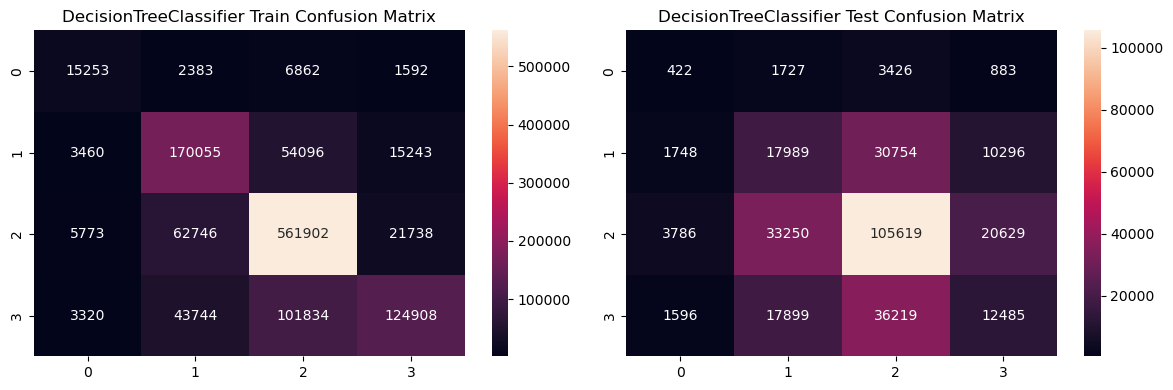

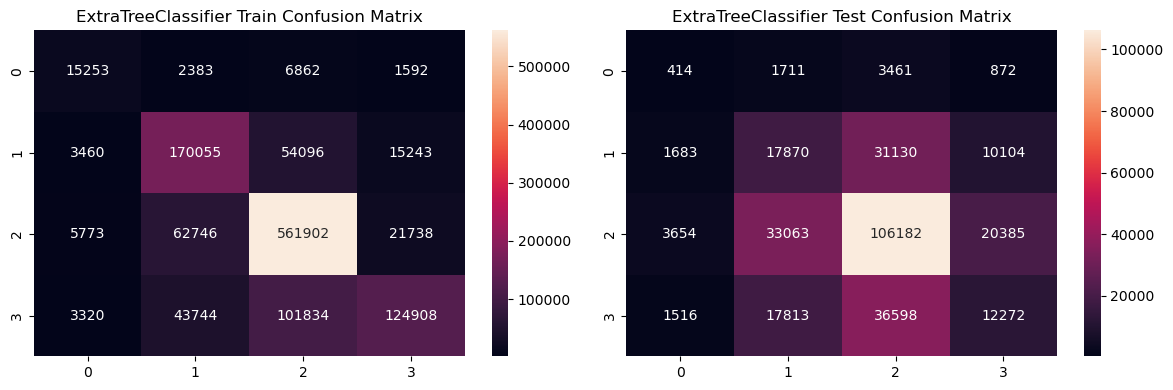

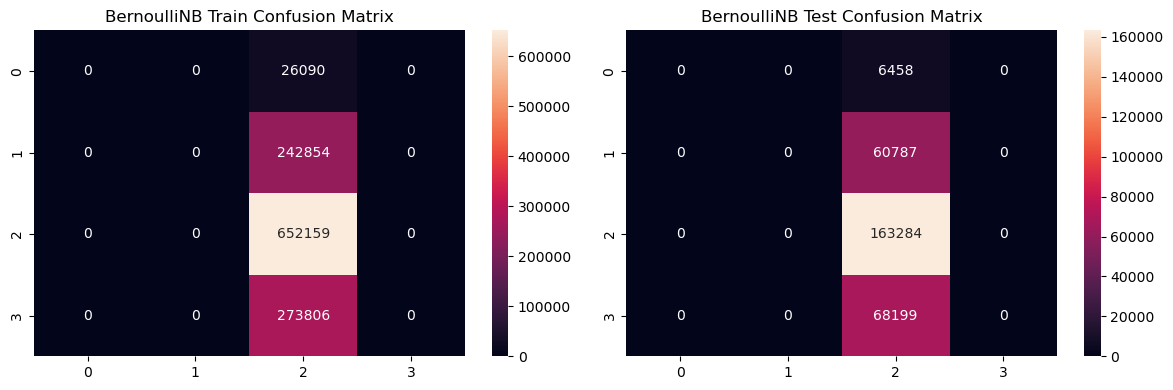

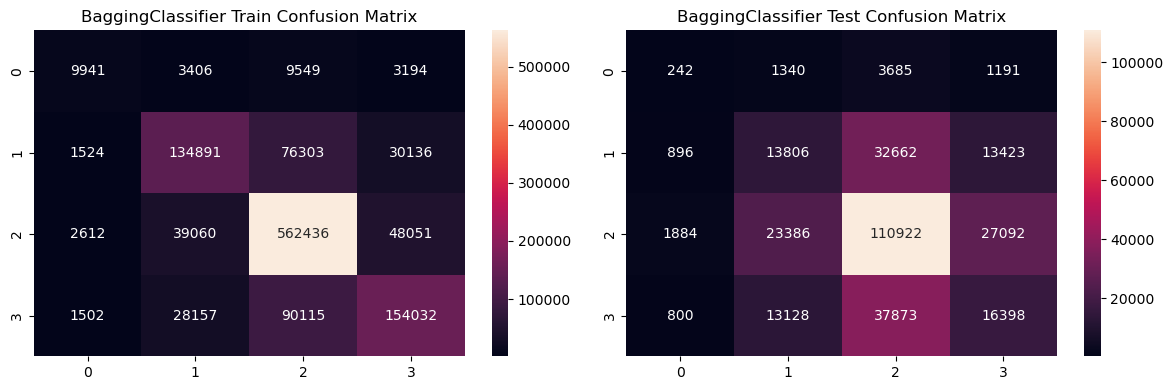

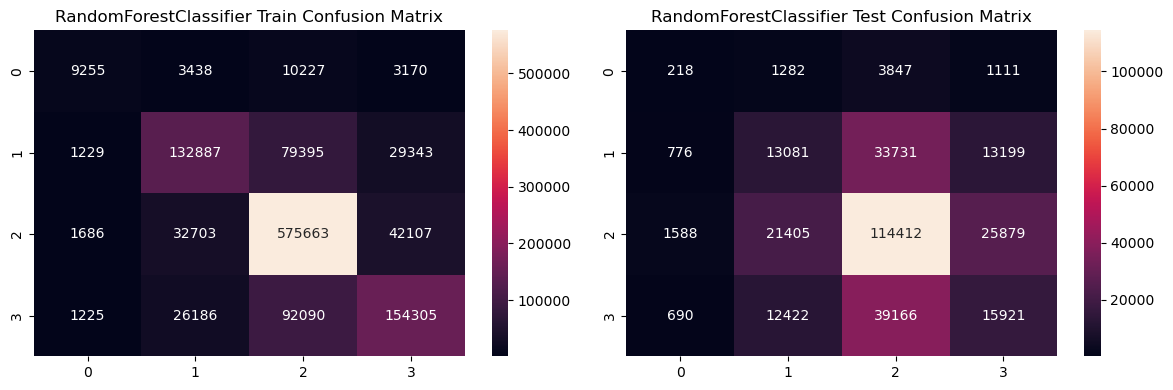

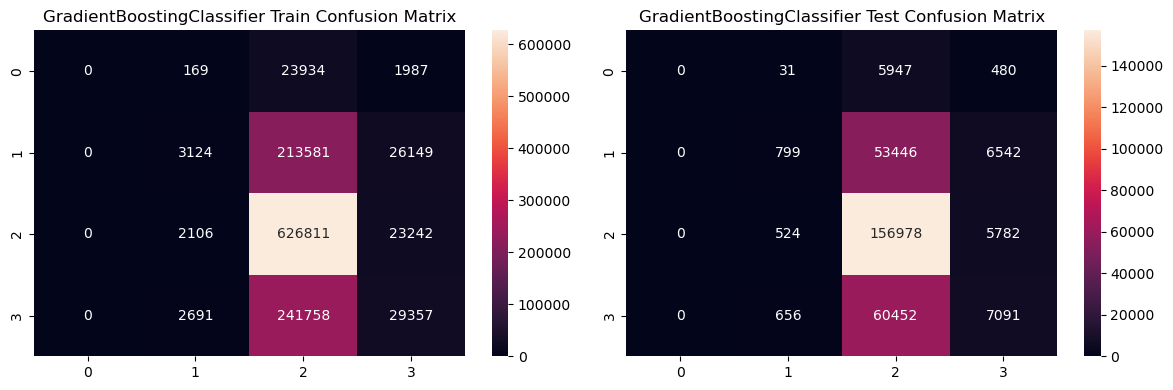

,name,train_accuracy,train_f1_score,test_accuracy,test_f1_score
0,DecisionTreeClassifier,0.729861,0.721216,0.456988,0.447880
1,ExtraTreeClassifier,0.729861,0.721216,0.457734,0.447570
2,BernoulliNB,0.545781,0.385407,0.546598,0.386356
3,BaggingClassifier,0.720808,0.712834,0.473233,0.458286
4,RandomForestClassifier,0.729855,0.720006,0.480812,0.461178
5,GradientBoostingClassifier,0.551751,0.432148,0.551900,0.431854


In [33]:
results = []

for model, name in zip(models, names):
    metrics = train_models(x_train, y_train, x_test, y_test, model, name)
    results.append(metrics)

results_df = pd.DataFrame(results)
display(results_df)

With the introduction of more variables, the result starts to differ from each other with different models.

Compaing the DecisionTreeClassifier and ExtraTreeClassifier, both of them provide a similar test score (0.447880,0.447570) and ExtraTreeClassifier provides a higher test accuracy.

For BernoulliNB model, it predicts everything into category 2 which means the model may not be suitable on prodicting flight departure status.

For BaggingClassifier, RandomForestClassifier and GradientBoostingClassifier, they all have different degree of improvement on both accuracy.

## 5.5 Final Version

In [39]:
models = [
    ExtraTreeClassifier(),
    BaggingClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

names = [
    'ExtraTreeClassifier',
    'BaggingClassifier',
    'RandomForestClassifier',
    'GradientBoostingClassifier'
]

In [41]:
x_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=1015)

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=1015)


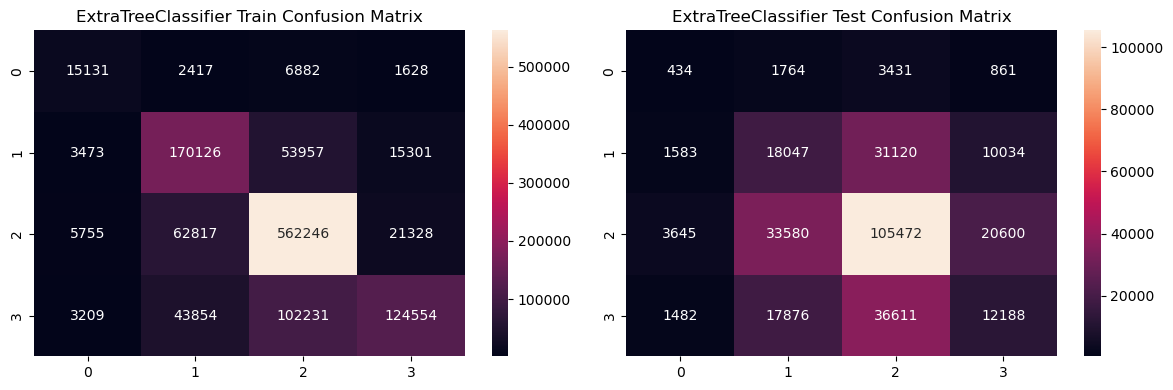

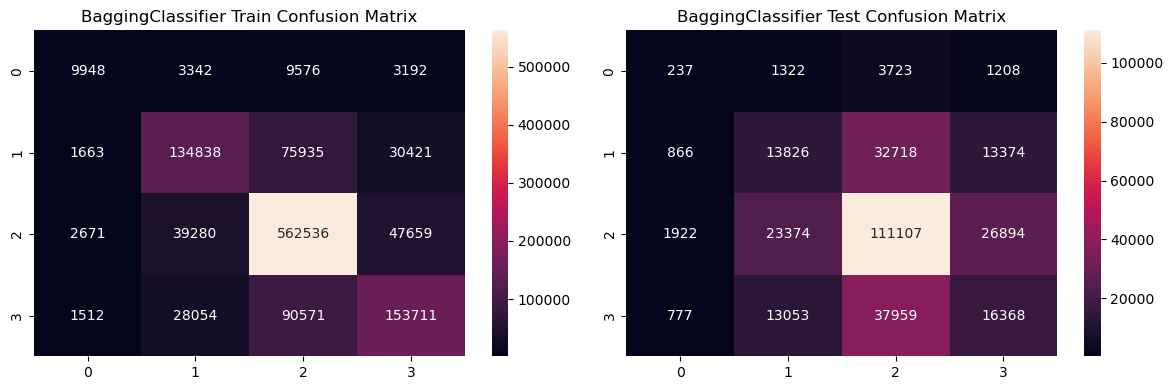

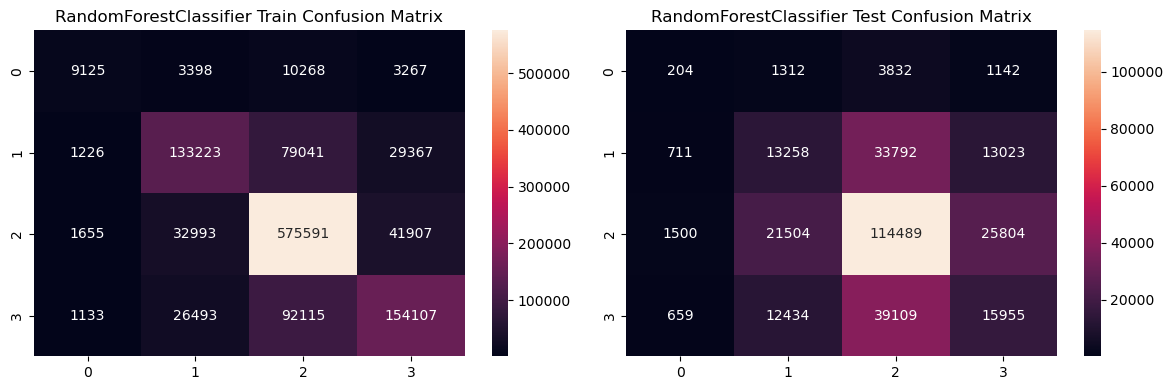

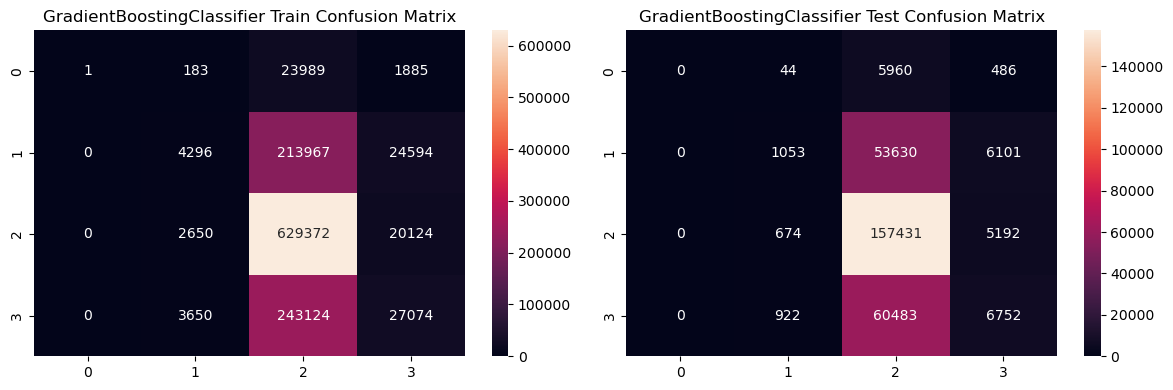

,name,train_accuracy,train_f1_score,test_accuracy,test_f1_score
0,ExtraTreeClassifier,0.729810,0.721051,0.455736,0.445946
1,BaggingClassifier,0.720585,0.712579,0.473802,0.458605
2,RandomForestClassifier,0.729801,0.719945,0.481729,0.462035
3,GradientBoostingClassifier,0.552965,0.432352,0.553132,0.432756


In [42]:
results = []
for model, name in zip(models, names):
    metrics = train_models(x_train, y_train, x_test, y_test, model, name)
    results.append(metrics)

results_df = pd.DataFrame(results)
display(results_df)

After using polynomial, there is slight improvement in test_accuracy. Here are the comparisons:
 - ExtraTreeClassifier (0.457734 -> 0.455736)
 - BaggingClassifier (0.473233 -> 0.473802)
 - RandomForestClassifier (0.480812 -> 0.481729)
 - GradientBoostingClassifier (0.551900 -> 0.553132)

Among all the models, GradientBoostingClassifier has the highest test accuracy. One possible explanation for this could be that polynomial features may yield better results in regression models compared to tree models.

# 6. Conclusion

Few factors can affect departure delay situation such as: 
Airlines, Origin City, Destination City, Month, Day of Week.

For DecisionTreeClassifier and ExtraTreeClassifier, they work almos the same in the analysis.

Ploynomial feature is not that useful to significantly improve the tree models used in analysis.

More random features should be concluded in the analysis of the model for further improvement, such as weather, accident and relation with other flights on the same day. However, these features are not recorded in the dataset as a reference and therefore our model may not effectively reflect an accurate prediction.